In [1]:
%config IPCompleter.greedy=True

In [1]:
# importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# fixing random seed as 2018 for reproducibility..!!
seed = 2018
np.random.seed(seed)

In [3]:
# loading libraries needed..!!
import cv2
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
# loading training file..!!
train = pd.read_csv('shuffled_fulldata.csv')

In [6]:
# function to read image and resize it.!!
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    return img

In [7]:
# path for training images
TRAIN_PATH = 'C:\\Users\\Spectre\\Downloads\\Project\\Full Data\\'

In [8]:
# loading training images as arrays to train_img numpy array
train_img = []

for img_path in tqdm(train['image_id'].values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████████████████████████████████████████████████████████████████████████| 7299/7299 [02:51<00:00, 42.64it/s]


In [9]:
# normalizing the data for easy computations.!!
data_feats = np.array(train_img, np.float32) / 255.

In [10]:
# labels for the training data..!!
labels = train['class'].tolist()

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(labels)

In [12]:
# make labels categorical via one-hot encoding...!
labels = to_categorical(labels)

In [13]:
# looking at the shape of the data..!! 

data_feats.shape

(7299, 64, 64, 3)

In [14]:
# making train - valid sets..!!

from sklearn.model_selection import train_test_split

train_feats, valid_feats, train_labels, valid_labels = train_test_split(data_feats, labels, test_size=0.33, random_state=seed)

In [4]:
# necessary layers for making a CNN..!!

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [5]:
# defining the model.!!

from keras.layers import Input, Dense
from keras.models import Model

inputs = Input((64, 64, 3), name='Input')

x = Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu', name = 'Conv2D_1')(inputs)
x = Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu', name = 'Conv2D_2')(x)
x = MaxPooling2D(pool_size=(2,2), name = 'MaxPool2D_1')(x)
x = Dropout(0.25, name='Dropout_1')(x)

x = Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu', name = 'Conv2D_3')(x)
x = Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu', name = 'Conv2D_4')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name = 'MaxPool2D_2')(x)
x = Dropout(0.25, name = 'Dropout_2')(x)

x = Flatten(name='Flatten')(x)

x = Dense(512, activation = "relu", name='Dense_1')(x)
x = Dropout(0.5, name='Dense_Dropout_1')(x)
x = Dense(128, activation = "relu", name='Dense_2')(x)

predictions = Dense(36, activation = "softmax", name='Dense_Output')(x)

model = Model(inputs=inputs, outputs=predictions)

In [6]:
# compiling model with categorical_crossentropy loss and adam optimizer.!!

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [37]:
# fitting the model on train data, evaluting on validatioon data, with batch_size as 64 for 17 epochs..!!

history = model.fit(train_feats, train_labels, validation_data=(valid_feats, valid_labels), batch_size=128, verbose=2, epochs=10)

Train on 4890 samples, validate on 2409 samples
Epoch 1/10
 - 373s - loss: 3.5191 - acc: 0.0499 - val_loss: 3.1828 - val_acc: 0.1204
Epoch 2/10
 - 367s - loss: 2.5578 - acc: 0.3006 - val_loss: 1.1846 - val_acc: 0.6746
Epoch 3/10
 - 366s - loss: 1.0563 - acc: 0.6847 - val_loss: 0.4912 - val_acc: 0.8713
Epoch 4/10
 - 366s - loss: 0.5866 - acc: 0.8241 - val_loss: 0.2630 - val_acc: 0.9319
Epoch 5/10
 - 366s - loss: 0.3906 - acc: 0.8832 - val_loss: 0.1785 - val_acc: 0.9622
Epoch 6/10
 - 366s - loss: 0.2350 - acc: 0.9235 - val_loss: 0.1036 - val_acc: 0.9772
Epoch 7/10
 - 366s - loss: 0.1917 - acc: 0.9403 - val_loss: 0.0816 - val_acc: 0.9805
Epoch 8/10
 - 366s - loss: 0.1296 - acc: 0.9597 - val_loss: 0.0874 - val_acc: 0.9826
Epoch 9/10
 - 368s - loss: 0.1290 - acc: 0.9611 - val_loss: 0.0742 - val_acc: 0.9851
Epoch 10/10
 - 366s - loss: 0.1222 - acc: 0.9626 - val_loss: 0.0807 - val_acc: 0.9809


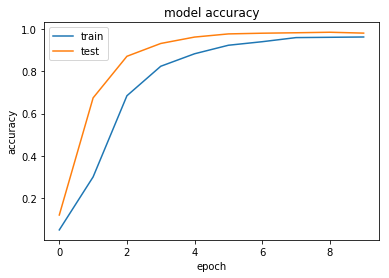

In [45]:
# taking a look at plot.!! - It's clear that there is no overfitting.!!

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
data_feats[0].shape

(64, 64, 3)

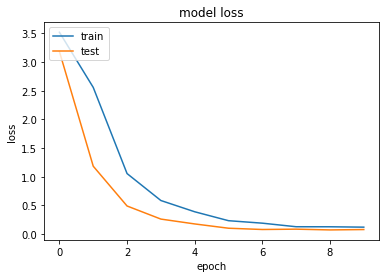

In [46]:
# taking a look at plot.!! - It's clear that there is no overfitting.!!

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
score = model.evaluate(valid_feats, valid_labels, verbose=0)
score[1] * 100

98.09049398337919

In [48]:
# function to plot confusion matrix..!

import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [49]:
labels_from_vector = np.argmax(labels, axis=1)
labels_from_vector

array([17, 19, 30, ..., 31, 13,  5], dtype=int64)

In [50]:
unique_labels = np.unique(labels_from_vector)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [51]:
original_labels = encoder.inverse_transform(unique_labels)
original_labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 
      dtype='<U1')

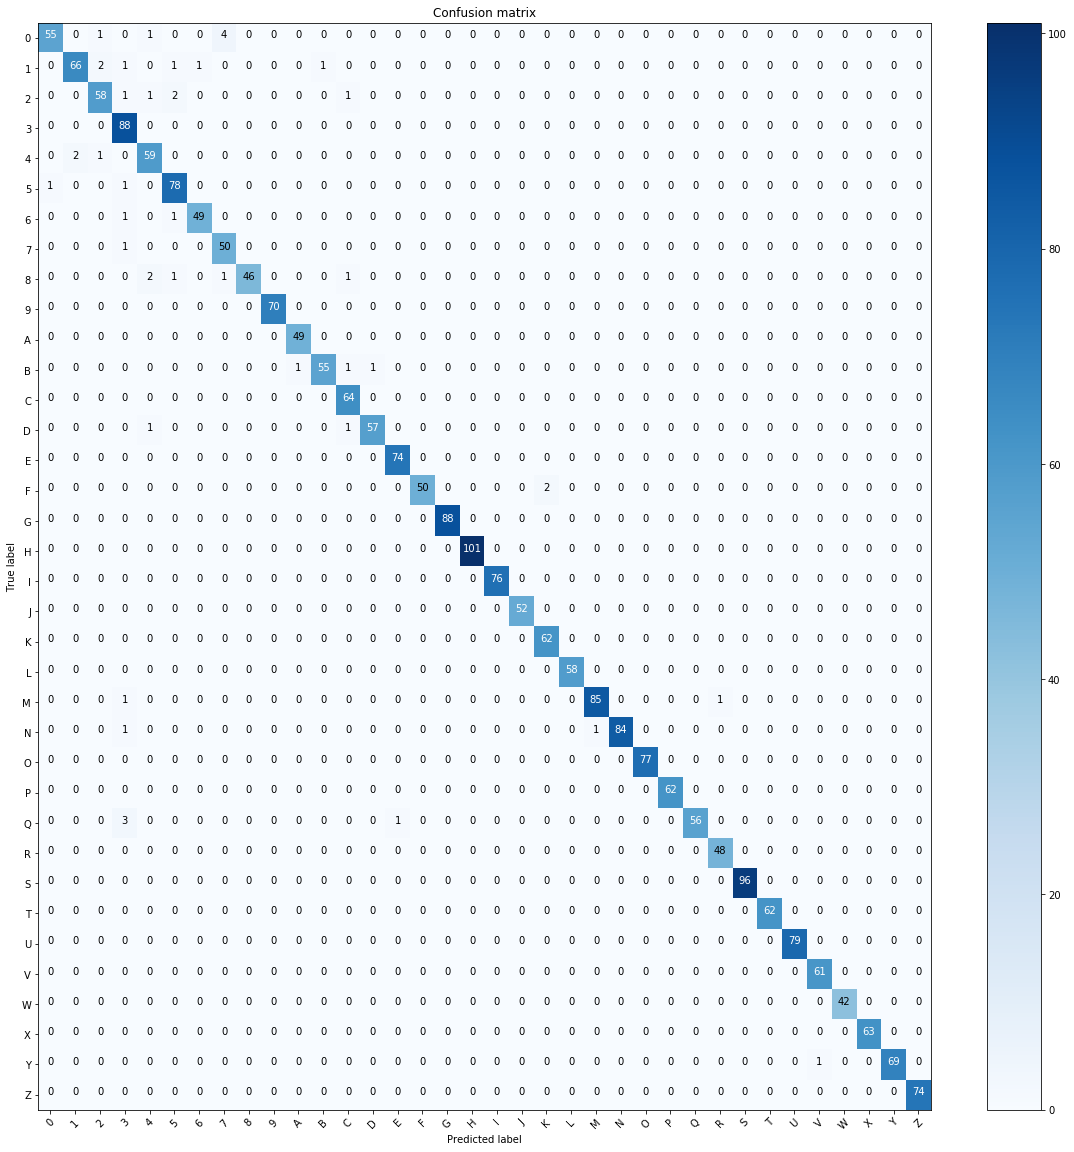

In [52]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(valid_feats)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(valid_labels, axis = 1)  
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

plot_confusion_matrix(confusion_mtx, classes = original_labels)

In [53]:
model.save('full_data_model.h5')

In [54]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [55]:
from keras.models import load_model

full_model = load_model('full_data_model.h5')

In [56]:
valid_preds = np.argmax(full_model.predict(valid_feats), axis=1)

precision_score(np.argmax(valid_labels, axis=1), valid_preds, average='weighted')

0.98162417998789087

In [57]:
recall_score(np.argmax(valid_labels, axis=1), valid_preds, average='weighted')

0.98090493980904936

In [59]:
import os

PATH = 'Test Data\\'

for test_files in os.listdir(PATH):
    
    print(test_files)
    
    test_feats = read_img(PATH + test_files)
    
    test_feats = np.array(test_feats, np.float32) / 255.
    test_feats = np.expand_dims(test_feats, axis=0)
    
    preds = np.argmax(model.predict(test_feats), axis=1)
    
    print(encoder.inverse_transform(preds))

IMG_5763.JPG
['M']
IMG_8123.JPG
['3']
IMG_8124.JPG
['C']
IMG_8125.JPG
['R']
IMG_8126.JPG
['Y']
IMG_8127.JPG
['A']
IMG_8128.JPG
['N']
V_176.jpg
['V']
